# Import Libraries 

In [2]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from stop_words import get_stop_words
from nltk.stem.snowball import SnowballStemmer
from gensim import corpora, models
import gensim
import nltk
nltk.download('stopwords')

stopwords.words("english")
import pandas as pd
import numpy as np
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
import re

from pprint import pprint
from nltk.tokenize import RegexpTokenizer
stop_words = stopwords.words('english')
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy
# Load the installed model "en_core_web_sm"
nlp = spacy.load("en_core_web_sm")
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")
stop_words.extend(['from', 'say','year', 'family', 'big', 'scene', 'hold', 'question', 'leader', 'hip', 'success', 'personal', 
                   'drip','man', 'game','could','today_one','example','say','charge','drop','top','first','team','release',
                   'tell','case','call','would','figure','second','place','tv', 'story', 'report',
                    'run', 'read', 'solve', 'continue_reading','day','people','back','life','apartment','turn','love','change','person','path','history','reveal','point',
                    'book','pop','battle','music','long','key','realize','history','reveal','point','book','pop','battle','music',
                   'long','key','realize','week','good','song','dark','money','listen','spotify','burn','transgend','artist'
                  'man',' thing',' project',' track',' moment',' talk',' body',' justice',' racial',' race'])
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

unable to import 'smart_open.gcs', disabling that module
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vibho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vibho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load NewAPI Dataset

In [3]:
df = pd.read_csv("E:/new-api-raw-data/NYCCrimeA.csv")
df.head(10)

,author,content,description,importance,publishedAt,source.id,source.name,title,url,urlToImage
0,Andy Swift,Brita might want to change her name to Bitter ...,Brita might want to change her name to Bitter ...,NaN,3/28/2020,NaN,Tvline.com,"In Defense of Aiden Zhane, the Bullied Queen o...",https://tvline.com/2020/03/28/rupauls-drag-rac...,https://pmctvline2.files.wordpress.com/2020/03...
1,Dana Scott,The ‘Gram – Mike Tyson will also be connected ...,During a conversation between Iron Mike and Fa...,NaN,3/31/2020,NaN,Hiphopdx.com,Mike Tyson Shares Various Tupac Stories With F...,https://hiphopdx.com/news/id.55219/title.mike-...,https://static.hiphopdx.com/2020/03/Tyson-Fat-...
2,NaN,memeorandum is an auto-generated summary of th...,Zeke Faux / Bloomberg : Suspected Mask Profite...,NaN,3/31/2020,NaN,Memeorandum.com,Suspected Mask Profiteer Arrested for Coughing...,https://www.memeorandum.com/200330/p160,https://assets.bwbx.io/images/users/iqjWHBFdfx...
3,Andrew Denney,A Brooklyn judge has tossed out assault charge...,A Brooklyn judge has tossed out assault charge...,NaN,3/30/2020,NaN,Nypost.com,Assault charges against workers in wild nail s...,https://nypost.com/2020/03/30/assault-charges-...,https://thenypost.files.wordpress.com/2020/03/...
4,Olivia Bensimon,"A man blew a gasket in a Brooklyn laundromat, ...","A man blew a gasket in a Brooklyn laundromat, ...",NaN,4/9/2020,NaN,Nypost.com,Video shows man assault laundromat worker over...,https://nypost.com/2020/04/09/man-assaults-lau...,https://thenypost.files.wordpress.com/2020/04/...
5,Rocco Parascandola,NaN,A Bronx woman who called police claiming an in...,NaN,4/21/2020,NaN,Nydailynews.com,Bronx woman arrested for murder after claiming...,https://www.nydailynews.com/new-york/nyc-crime...,https://www.nydailynews.com/resizer/lrLoSeKmAH...
6,Anabel Sosa,NYPD Commissioner Dermot Shea ripped the man c...,NYPD Commissioner Dermot Shea ripped the man c...,NaN,4/8/2020,NaN,Nypost.com,NYPD Commissioner Shea condemns ‘disturbing’ a...,https://nypost.com/2020/04/08/nypd-commissione...,https://thenypost.files.wordpress.com/2020/04/...
7,"Georgett Roberts, Craig McCarthy, Ben Feuerherd",An NYPD cop was caught on camera slugging a wo...,An NYPD cop was caught on camera slugging a wo...,NaN,4/8/2020,NaN,Nypost.com,Cop slugs woman after another officer is attac...,https://nypost.com/2020/04/08/cop-slugs-woman-...,https://thenypost.files.wordpress.com/2020/04/...
8,Bossip Staff,Source: Noam Galai / Getty\r\nAccording to Pag...,French Montana Slapped With Lawsuit After Alle...,NaN,3/28/2020,NaN,Bossip.com,Yikes: French Montana Slapped With A Lawsuit A...,http://bossip.com/1860360/yikes-french-montana...,https://bossip.files.wordpress.com/2020/03/158...
9,NaN,Bringing us back into the general idea of the ...,"The New York festival is a ""leader for change""...",NaN,4/2/2020,NaN,Mixmag.net,Dweller festival is reclaiming techno’s black ...,https://mixmag.net/feature/dweller-festival-ne...,https://mixmag.net/assets/uploads/images/_face...


# Remove regular expressions

In [4]:
# Convert to list
data = df['description']
data = data.astype('str');
# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]
data[:1]

['Brita might want to change her name to Bitter after Friday’s episode of RuPaul’s Drag Race, which ended with a particularly nasty vocal assault against Season 12 dark horse Aiden Zhane. Though several queens expressed their surprise at Aiden’s success — Jacki…']

# Step 1:Tokenization
 Converting a document to its atomic elements

In [5]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['brita', 'might', 'want', 'to', 'change', 'her', 'name', 'to', 'bitter', 'after', 'friday', 'episode', 'of', 'rupaul', 'drag', 'race', 'which', 'ended', 'with', 'particularly', 'nasty', 'vocal', 'assault', 'against', 'season', 'dark', 'horse', 'aiden', 'zhane', 'though', 'several', 'queens', 'expressed', 'their', 'surprise', 'at', 'aiden', 'success', 'jacki']]


# Step 2 : Create Bigram and Trigram Models
Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.

In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['brita', 'might', 'want', 'to', 'change', 'her', 'name', 'to', 'bitter', 'after', 'friday', 'episode', 'of', 'rupaul', 'drag', 'race', 'which_ended', 'with', 'particularly', 'nasty', 'vocal', 'assault', 'against', 'season', 'dark', 'horse', 'aiden', 'zhane', 'though', 'several', 'queens', 'expressed', 'their', 'surprise', 'at', 'aiden', 'success', 'jacki']


# Step 3: Remove Stopwords Make Bigrams and Lemmatize


In [7]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


In [8]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
#!python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['may', 'want', 'name', 'race', 'end', 'particularly', 'nasty', 'vocal', 'assault', 'season', 'horse', 'several', 'queen', 'express', 'surprise']]


# Step 4: Create the Dictionary and Corpus needed for Topic Modeling

In [9]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]]


In [10]:
id2word[0]

'assault'

In [11]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('assault', 1),
  ('end', 1),
  ('express', 1),
  ('horse', 1),
  ('may', 1),
  ('name', 1),
  ('nasty', 1),
  ('particularly', 1),
  ('queen', 1),
  ('race', 1),
  ('season', 1),
  ('several', 1),
  ('surprise', 1),
  ('vocal', 1),
  ('want', 1)]]

# Step 5 : Build the Topic Model(LDA)

In [12]:
#Build the topic Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
#Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"season" + 0.012*"appear" + 0.009*"post" + 0.008*"analysis" + '
  '0.008*"hour" + 0.007*"find" + 0.007*"former" + 0.007*"project" + '
  '0.006*"front" + 0.006*"draft"'),
 (1,
  '0.026*"police" + 0.026*"old" + 0.024*"say" + 0.018*"murder" + 0.015*"smoke" '
  '+ 0.011*"piece" + 0.007*"hold" + 0.007*"woman" + 0.006*"official" + '
  '0.006*"forward"'),
 (2,
  '0.018*"charge" + 0.015*"get" + 0.013*"shoot" + 0.012*"say" + '
  '0.012*"robbery" + 0.012*"suspect" + 0.010*"cop" + 0.009*"find" + '
  '0.008*"death" + 0.008*"turn"'),
 (3,
  '0.011*"year" + 0.009*"know" + 0.009*"time" + 0.009*"go" + 0.008*"way" + '
  '0.007*"car" + 0.007*"even" + 0.007*"always" + 0.007*"head" + '
  '0.007*"episode"'),
 (4,
  '0.014*"take" + 0.012*"make" + 0.011*"come" + 0.010*"night" + 0.010*"season" '
  '+ 0.009*"last" + 0.008*"arrest" + 0.008*"see" + 0.008*"may" + '
  '0.008*"attack"')]


# Step 6: Compute Model Perplexity and Coherence Score

In [14]:
 #Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.563552181588279

Coherence Score:  0.5300546856983305


# Build the LDA Mallet Model
 Gensim’s inbuilt version of the LDA algorithm. Mallet’s version, however, often gives a better quality of topics.

In [15]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = 'C:/Users/vibho/Downloads/mallet-2.0.8/mallet-2.0.8'
mallet_path = 'C:/Users/vibho/Downloads/mallet-2.0.8/mallet-2.0.8/bin/mallet'

In [16]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

# update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [17]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(16,
  [('official', 0.06405693950177936),
   ('bribe', 0.046263345195729534),
   ('executive', 0.046263345195729534),
   ('pay', 0.03914590747330961),
   ('company', 0.03202846975088968),
   ('allege', 0.03202846975088968),
   ('reveal', 0.03202846975088968),
   ('group', 0.03202846975088968),
   ('member', 0.02491103202846975),
   ('vote', 0.02491103202846975)]),
 (18,
  [('piece', 0.05),
   ('release', 0.04583333333333333),
   ('day', 0.04583333333333333),
   ('large', 0.029166666666666667),
   ('cut', 0.025),
   ('string', 0.020833333333333332),
   ('remain', 0.020833333333333332),
   ('middle', 0.016666666666666666),
   ('blood', 0.016666666666666666),
   ('foot', 0.016666666666666666)]),
 (4,
  [('cop', 0.10150375939849623),
   ('face', 0.07142857142857142),
   ('night', 0.05639097744360902),
   ('attack', 0.041353383458646614),
   ('partner', 0.03759398496240601),
   ('mask', 0.03759398496240601),
   ('front', 0.03383458646616541),
   ('catch', 0.03383458646616541),
   ('gather

In [18]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


In [19]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

# Find the optimal number of topics for LDA

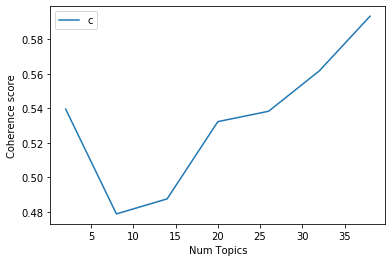

In [22]:
 #Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5395
Num Topics = 8  has Coherence Value of 0.4788
Num Topics = 14  has Coherence Value of 0.4875
Num Topics = 20  has Coherence Value of 0.5322
Num Topics = 26  has Coherence Value of 0.5382
Num Topics = 32  has Coherence Value of 0.5616
Num Topics = 38  has Coherence Value of 0.5933


In [24]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.063*"today" + 0.063*"show" + 0.048*"launch" + 0.033*"phone" + '
  '0.030*"platform" + 0.026*"stream" + 0.026*"episode" + 0.022*"talk" + '
  '0.019*"sized" + 0.019*"continue"'),
 (1,
  '0.123*"charge" + 0.047*"prosecutor" + 0.043*"state" + 0.040*"law" + '
  '0.040*"federal" + 0.033*"trial" + 0.029*"public" + 0.029*"recently" + '
  '0.018*"drop" + 0.018*"alleged"'),
 (2,
  '0.068*"home" + 0.064*"assault" + 0.051*"sexual" + 0.038*"source" + '
  '0.038*"allegedly" + 0.030*"accord" + 0.026*"player" + 0.021*"famous" + '
  '0.017*"finally" + 0.017*"commit"'),
 (3,
  '0.071*"official" + 0.050*"bribe" + 0.046*"executive" + 0.039*"pay" + '
  '0.032*"allege" + 0.029*"world" + 0.025*"indictment" + 0.025*"member" + '
  '0.025*"reveal" + 0.025*"vote"'),
 (4,
  '0.076*"include" + 0.044*"high" + 0.036*"moment" + 0.028*"prison" + '
  '0.024*"rapper" + 0.024*"continue_reading" + 0.024*"die" + 0.024*"hear" + '
  '0.020*"building" + 0.020*"live"'),
 (5,
  '0.055*"claim" + 0.039*"head" + 0.035*"b

In [25]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.5224774205025822


# Find the dominant topic in each sentence

In [26]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
publishedAt = df.publishedAt
#'publishedAt',
df_dominant_topic['publishedAt'] = publishedAt 

df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,publishedAt
0,0,6.0,0.0731,"find, season, victim, worker, fan, week, dead,...",Brita might want to change her name to Bitter ...,3/28/2020
1,1,4.0,0.0648,"include, high, moment, prison, rapper, continu...",During a conversation between Iron Mike and Fa...,3/31/2020
2,2,2.0,0.0699,"home, assault, sexual, source, allegedly, acco...",Zeke Faux / Bloomberg : Suspected Mask Profite...,3/31/2020
3,3,6.0,0.0998,"find, season, victim, worker, fan, week, dead,...",A Brooklyn judge has tossed out assault charge...,3/30/2020
4,4,5.0,0.0897,"claim, head, black, base, shortage, incident, ...","A man blew a gasket in a Brooklyn laundromat, ...",4/9/2020
5,5,18.0,0.1574,"murder, woman, hour, release, interview, city,...",A Bronx woman who called police claiming an in...,4/21/2020
6,6,15.0,0.1855,"make, face, night, attack, partner, officer, m...",NYPD Commissioner Dermot Shea ripped the man c...,4/8/2020
7,7,15.0,0.1067,"make, face, night, attack, partner, officer, m...",An NYPD cop was caught on camera slugging a wo...,4/8/2020
8,8,2.0,0.2601,"home, assault, sexual, source, allegedly, acco...",French Montana Slapped With Lawsuit After Alle...,3/28/2020
9,9,1.0,0.0664,"charge, prosecutor, state, law, federal, trial...","The New York festival is a ""leader for change""...",4/2/2020


# Find the most representative document for each topic

In [27]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.3183,"today, show, launch, phone, platform, stream, ...","Quibi, the new streaming platform that shares ..."
1,1.0,0.3295,"charge, prosecutor, state, law, federal, trial...",An alleged serial bank robber who became a pos...
2,2.0,0.2601,"home, assault, sexual, source, allegedly, acco...",French Montana Slapped With Lawsuit After Alle...
3,3.0,0.2422,"official, bribe, executive, pay, allege, world...",Former sports marketing executives of 21st Cen...
4,4.0,0.1949,"include, high, moment, prison, rapper, continu...","Kevin Thomas Duffy, a federal judge who presid..."


# Topic distribution across documents

In [28]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(25)


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,6.0,"find, season, victim, worker, fan, week, dead,...",32.0,0.0656
1.0,4.0,"include, high, moment, prison, rapper, continu...",23.0,0.0471
2.0,2.0,"home, assault, sexual, source, allegedly, acco...",29.0,0.0594
3.0,6.0,"find, season, victim, worker, fan, week, dead,...",27.0,0.0553
4.0,5.0,"claim, head, black, base, shortage, incident, ...",31.0,0.0635
5.0,18.0,"murder, woman, hour, release, interview, city,...",23.0,0.0471
6.0,15.0,"make, face, night, attack, partner, officer, m...",30.0,0.0615
7.0,15.0,"make, face, night, attack, partner, officer, m...",17.0,0.0348
8.0,2.0,"home, assault, sexual, source, allegedly, acco...",21.0,0.0430
9.0,1.0,"charge, prosecutor, state, law, federal, trial...",26.0,0.0533


In [30]:
temp_list = [] # A temp variable for us to form a dataframe

for x in range(488): # For all the documents
    new_doc = data[x] # Get the content of document (already preprocessed)
    new_doc_bow = id2word.doc2bow([new_doc]) # Form a BOW
    temp = lda_model.get_document_topics(new_doc_bow, minimum_probability=0.0) # Get the doc-topic dist
    temp_list.append([round(n,5) for _, n in temp]) # Add in all the probabilities

# Create Dataframe for our probabilities
doc_topic_df_prob = pd.DataFrame(temp_list)

# Get a copy of the original table containing document and their contents
df_original_copy = df_dominant_topic

# Merge the 2 dataframe together
doc_topic_table = pd.concat([df_original_copy, doc_topic_df_prob], axis=1)

# Remove certain rows for a more concise table
doc_topic_table = doc_topic_table[[col for col in doc_topic_table.columns if col not in 
                                       ['Dominant_Topic','Topic_Perc_Contrib','title']]]
# Renaming columns
doc_topic_table.rename(columns={0: "Topic 1", 1: "Topic 2", 2: "Topic 3", 3: "Topic 4",4:"Topic 5"},
                       inplace=True)
# Display the table
doc_topic_table.head(25)

,Document_No,Keywords,Text,publishedAt,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5
0,0,"find, season, victim, worker, fan, week, dead,...",Brita might want to change her name to Bitter ...,3/28/2020,0.1774,0.16452,0.24345,0.22826,0.18637
1,1,"include, high, moment, prison, rapper, continu...",During a conversation between Iron Mike and Fa...,3/31/2020,0.1774,0.16452,0.24345,0.22826,0.18637
2,2,"home, assault, sexual, source, allegedly, acco...",Zeke Faux / Bloomberg : Suspected Mask Profite...,3/31/2020,0.1774,0.16452,0.24345,0.22826,0.18637
3,3,"find, season, victim, worker, fan, week, dead,...",A Brooklyn judge has tossed out assault charge...,3/30/2020,0.1774,0.16452,0.24345,0.22826,0.18637
4,4,"claim, head, black, base, shortage, incident, ...","A man blew a gasket in a Brooklyn laundromat, ...",4/9/2020,0.1774,0.16452,0.24345,0.22826,0.18637
5,5,"murder, woman, hour, release, interview, city,...",A Bronx woman who called police claiming an in...,4/21/2020,0.1774,0.16452,0.24345,0.22826,0.18637
6,6,"make, face, night, attack, partner, officer, m...",NYPD Commissioner Dermot Shea ripped the man c...,4/8/2020,0.1774,0.16452,0.24345,0.22826,0.18637
7,7,"make, face, night, attack, partner, officer, m...",An NYPD cop was caught on camera slugging a wo...,4/8/2020,0.1774,0.16452,0.24345,0.22826,0.18637
8,8,"home, assault, sexual, source, allegedly, acco...",French Montana Slapped With Lawsuit After Alle...,3/28/2020,0.1774,0.16452,0.24345,0.22826,0.18637
9,9,"charge, prosecutor, state, law, federal, trial...","The New York festival is a ""leader for change""...",4/2/2020,0.1774,0.16452,0.24345,0.22826,0.18637


# Plot Topic Over Time Modelling

In [31]:
top50dfnew = df_dominant_topic.head()
top50dfnew=top50dfnew.head()
order = [i for i in top50dfnew.Keywords]
order

['find, season, victim, worker, fan, week, dead, make, promise, young',
 'include, high, moment, prison, rapper, continue_reading, die, hear, building, live',
 'home, assault, sexual, source, allegedly, accord, player, famous, finally, commit',
 'find, season, victim, worker, fan, week, dead, make, promise, young',
 'claim, head, black, base, shortage, incident, government, nation, pandemic, create']

In [32]:
list_of_docs = []
doc_topic_table_limited = doc_topic_table.head(100)
for i in range(1,5):
    temp = doc_topic_table_limited[['publishedAt','Keywords','Topic %s' %i]]
    temp.rename(columns={'Topic %s' %i: "weight"}, inplace = True)
    list_of_docs.append(temp)
db = pd.concat(list_of_docs)
db.keywords = [i for i in order for j in range(32)] # loop through number of docs
db.rename(columns={'Keywords': 'topic_keywords','Document_No': 'publishedAt'}, inplace=True)

C:\Users\vibho\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\vibho\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


# Topic Over Time Model

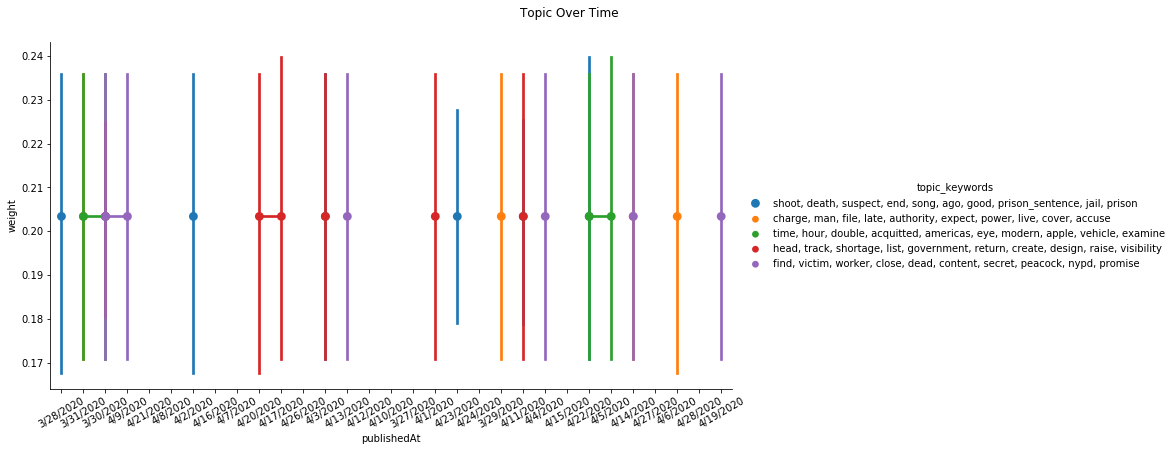

In [104]:
import seaborn as sns
p = sns.factorplot(x="publishedAt", y='weight', hue_order=order, hue='topic_keywords',size=6, aspect=1.8, data=db)
p.fig.subplots_adjust(top=0.9)
p.fig.suptitle('Topic Over Time')
p.set_xticklabels(rotation=30)
p

# Visualize the Topic Model using pyLDAvis

In [115]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\vibho\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.193161  0.088955       1        1  23.264751
3     -0.042114 -0.184224       2        1  21.142883
4     -0.108219  0.045465       3        1  19.358990
0     -0.120466  0.120581       4        1  18.134342
1      0.077638 -0.070777       5        1  18.099031, topic_info=     Category       Freq       Term      Total  loglift  logprob
241   Default  27.000000        old  27.000000  30.0000  30.0000
53    Default  33.000000     police  33.000000  29.0000  29.0000
172   Default  21.000000        get  21.000000  28.0000  28.0000
65    Default  49.000000        say  49.000000  27.0000  27.0000
1181  Default  16.000000      smoke  16.000000  26.0000  26.0000
...       ...        ...        ...        ...      ...      ...
578    Topic5   4.232366       week   6.921578   1.2174  -5.5144
86     Topic5   5.898970        new  30.111963   0.0792  -5.1824
528    Topic5   4.319191  afternoon   7.849581   1.1119  -5.4941
232    Topic5   3.966707      black   6.683825   1.1876  -5.5792
136    Topic5   4.173484        way  13.898392   0.5063  -5.5284

[257 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
91        1  0.906791     accord
528       2  0.382186  afternoon
528       5  0.509581  afternoon
19        3  0.912733      agent
529       2  0.977017  aggravate
...     ...       ...        ...
788       1  0.867162       work
203       3  0.819472      world
203       4  0.136579      world
414       2  0.840562       year
414       5  0.129317       year

[282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 1, 2])

In [116]:
pyLDAvis.save_html(vis, 'lda.html')

# Wordclouds of Dominant Topic

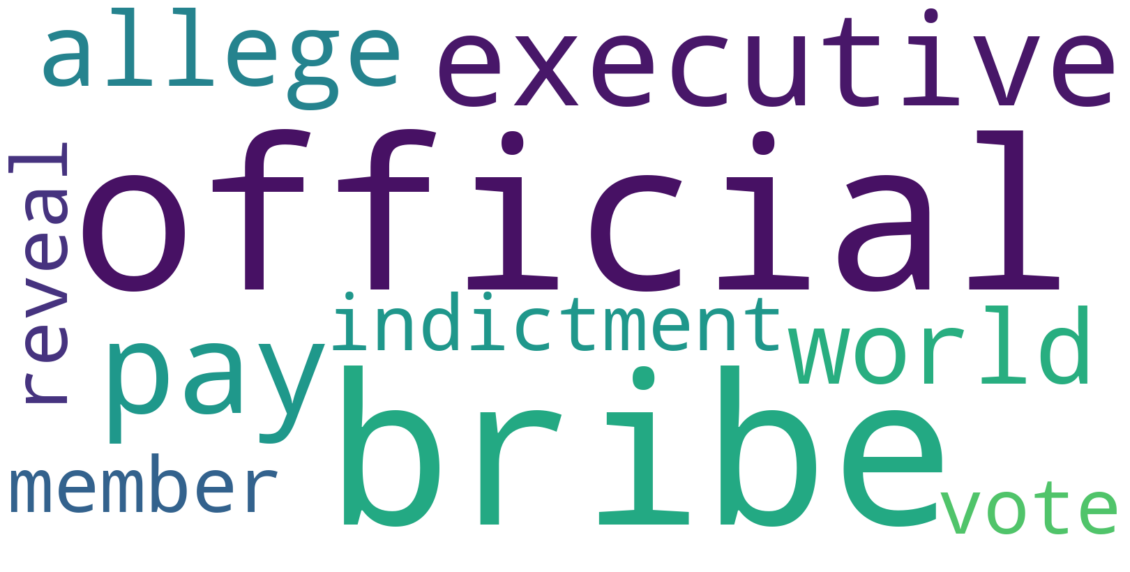

In [42]:
from wordcloud import WordCloud
text = []
for i in df_dominant_topics.Topic_Keywords[55]:
    text.append(i)#here we are adding word to text array but it's looking like this ['Larency','Homicide','Robbery']
text = ''.join(map(str, text)) #Now we make all of them like this [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

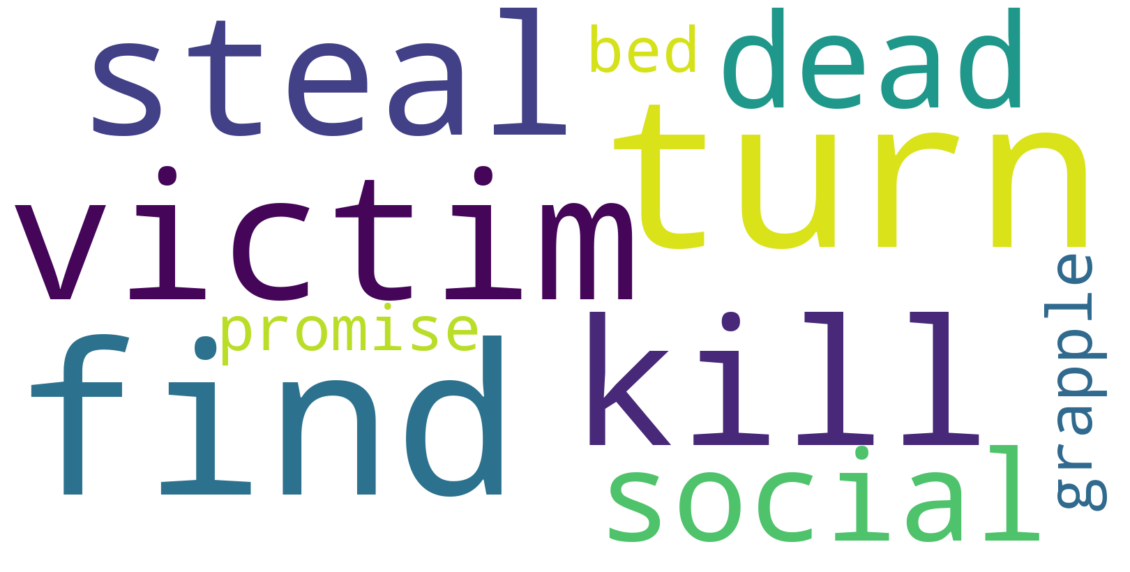

In [45]:
from wordcloud import WordCloud
text = []
for i in df_dominant_topics.Topic_Keywords[96]:
    text.append(i)#here we are adding word to text array but it's looking like this ['Larency','Homicide','Robbery']
text = ''.join(map(str, text)) #Now we make all of them like this [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

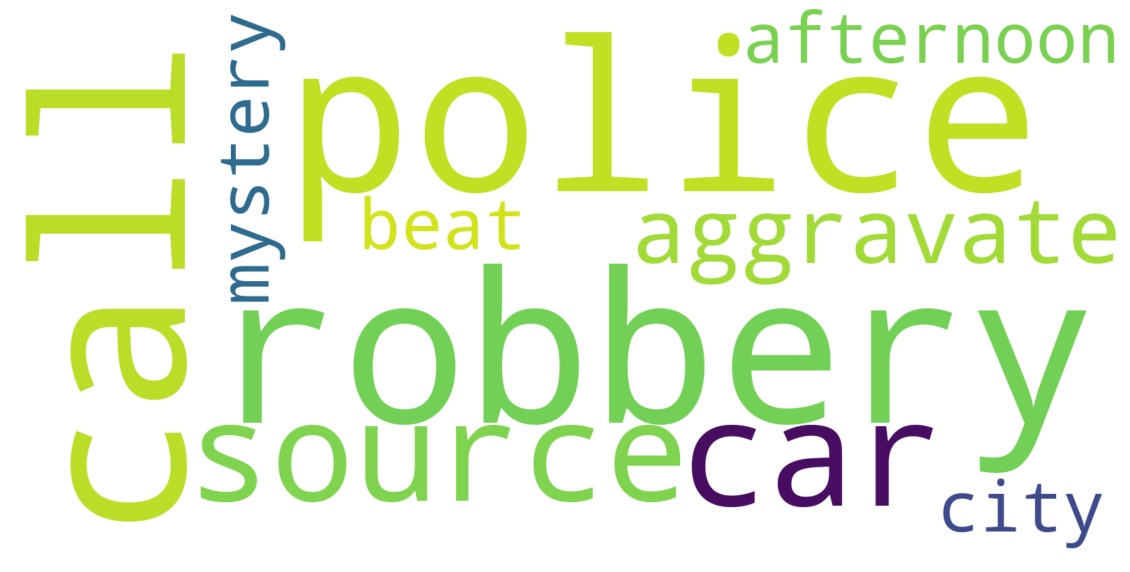

In [65]:
from wordcloud import WordCloud
text = []
for i in df_dominant_topics.Topic_Keywords[5]:
    text.append(i)#here we are adding word to text array but it's looking like this ['Larency','Homicide','Robbery']
text = ''.join(map(str, text)) #Now we make all of them like this [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(20,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

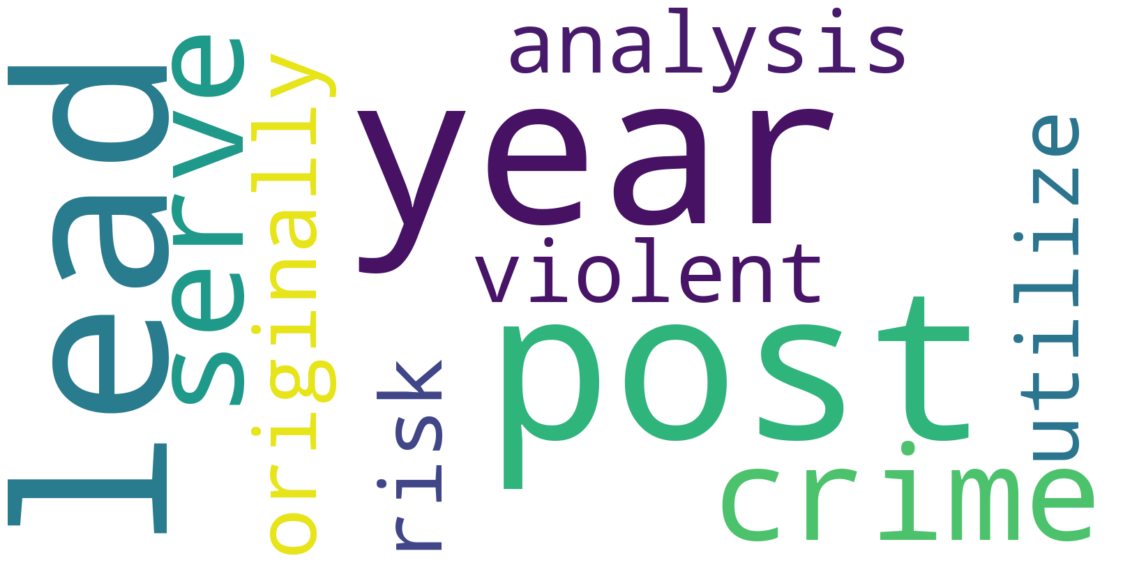

In [66]:
from wordcloud import WordCloud
text = []
for i in df_dominant_topics.Topic_Keywords[48]:
    text.append(i)#here we are adding word to text array but it's looking like this ['Larency','Homicide','Robbery']
text = ''.join(map(str, text)) #Now we make all of them like this [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

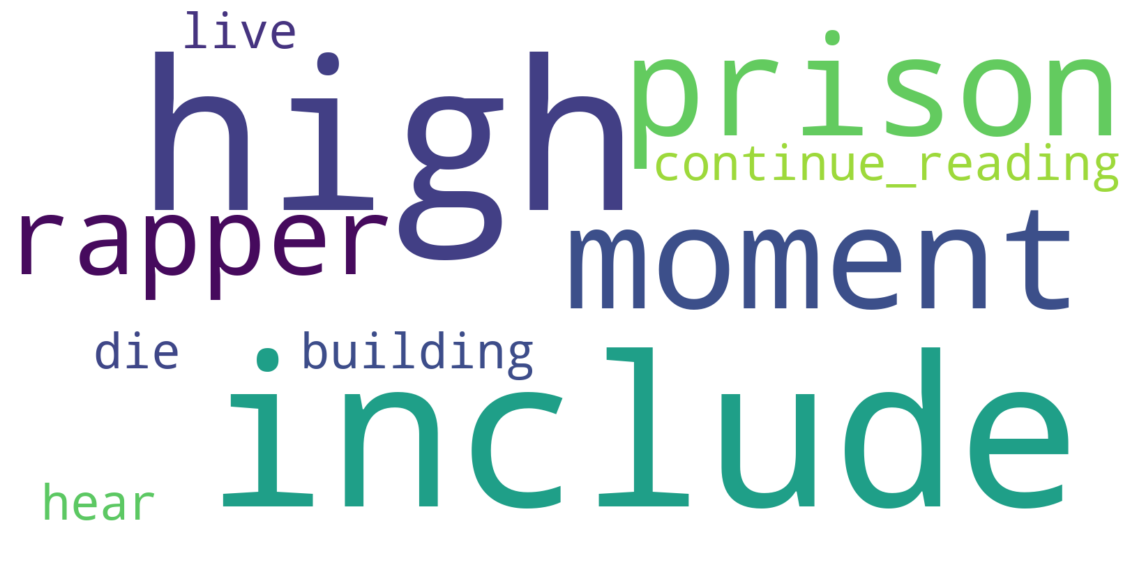

In [34]:
from wordcloud import WordCloud
text = []
for i in df_dominant_topics.Topic_Keywords[36]:
    text.append(i)#here we are adding word to text array but it's looking like this ['Larency','Homicide','Robbery']
text = ''.join(map(str, text)) #Now we make all of them like this [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

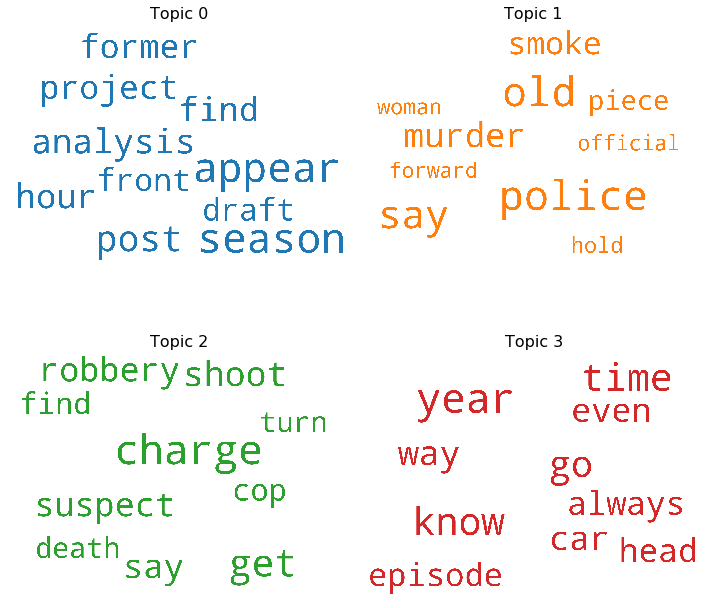

In [37]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


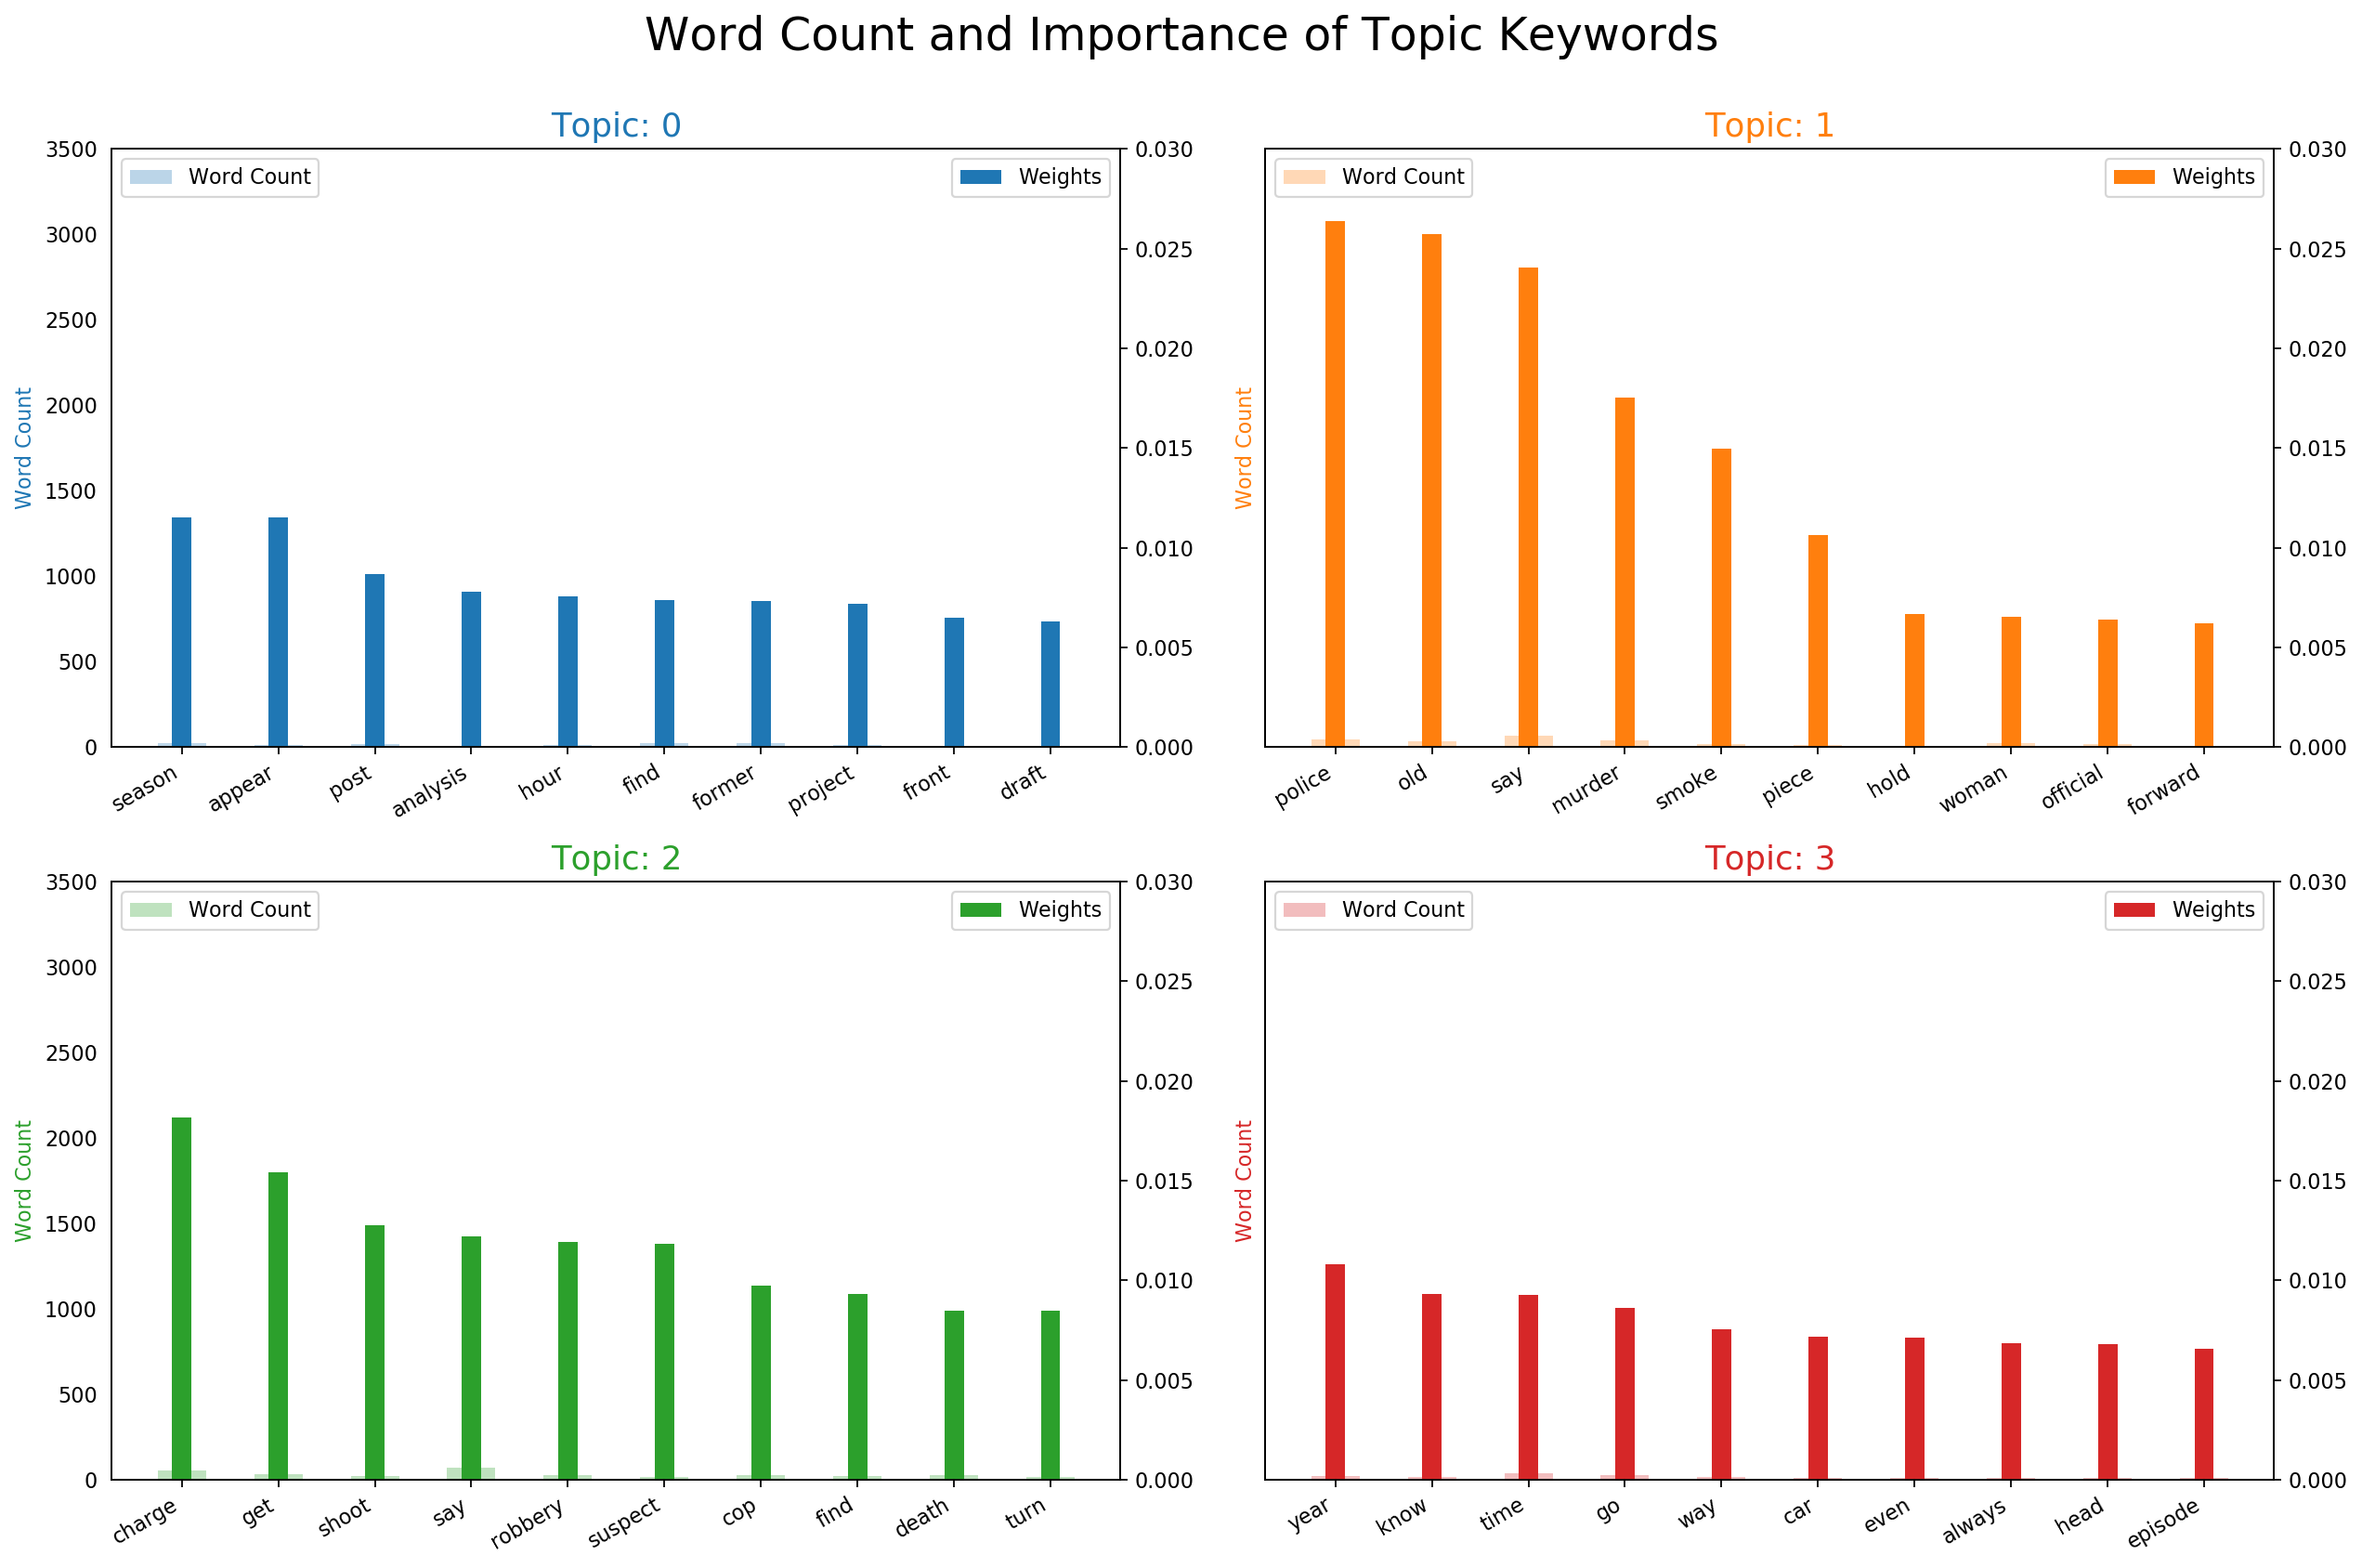

In [86]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

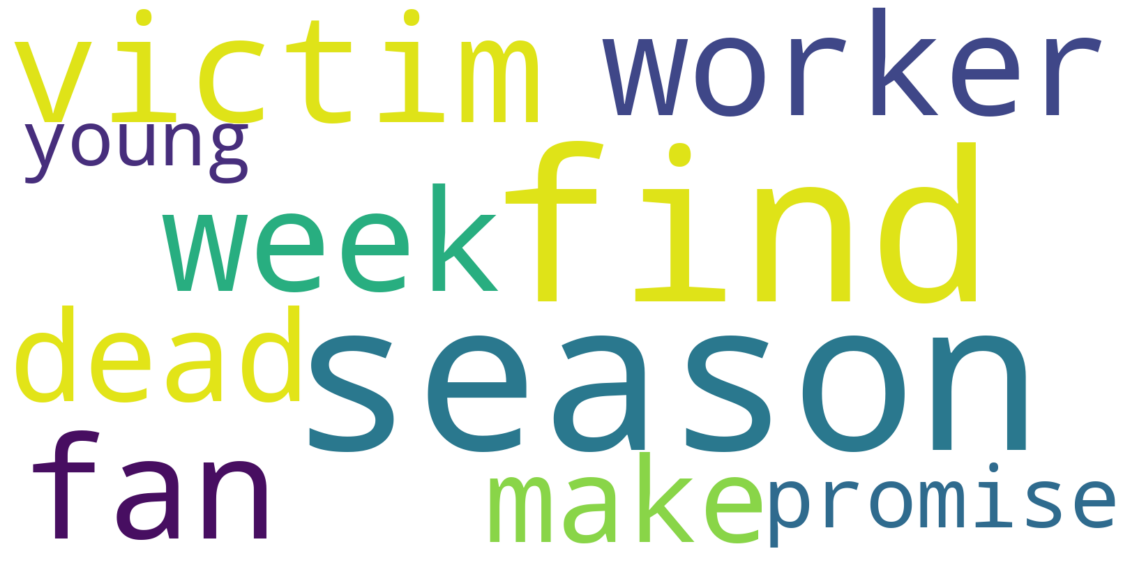

In [33]:
from wordcloud import WordCloud
text = []
for i in df_dominant_topics.Topic_Keywords[0]:
    text.append(i)#here we are adding word to text array but it's looking like this ['Larency','Homicide','Robbery']
text = ''.join(map(str, text)) #Now we make all of them like this [LarencyHomicideRobbery]

wordcloud = WordCloud(width=1600, height=800, max_font_size=300,background_color='white').generate(text)
plt.figure(figsize=(20,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()